In [60]:
import os
from torch.utils.data import Dataset
from torchvision.transforms import ToTensor
from PIL import Image
import torchvision.transforms as v2
from utils import Converter
from torchvision.transforms.functional import center_crop

class PostDamDataset(Dataset):
	def __init__(self, img_dir, masks_dir, extension,transforms=None, crop=None, augment_mask=False):
		self.idir = img_dir
		self.mdir = masks_dir		
		self.transforms = transforms		
		self.extension = extension
		self.items = os.listdir(self.idir)
		self.files = [item for item in self.items if os.path.isfile(os.path.join(self.idir, item))]
		self.c = Converter()
		self.crop = crop
		self.augment_mask = augment_mask
	def __len__(self):
		return len(self.files)
	def __getitem__(self, idx):
		img_path = os.path.join(self.idir, "Image_{}{}".format(idx, self.extension))
		mask_path = os.path.join(self.mdir, "Label_{}{}".format(idx, self.extension))
		tif_img = Image.open(img_path)
		tif_mask = Image.open(mask_path)
		final_mask = self.c.convert(ToTensor()(tif_mask))
		final_image = ToTensor()(tif_img)
		if self.transforms:  # if transforms are provided, apply them
			if self.augment_mask:
				final_image, final_mask = self.transforms(final_image, final_mask)
			else:
				final_image = self.transforms(final_image)		
		if self.crop:
			final_image = center_crop(final_image, self.crop)
			final_mask = center_crop(final_mask, self.crop)
		return (final_image, final_mask, idx)

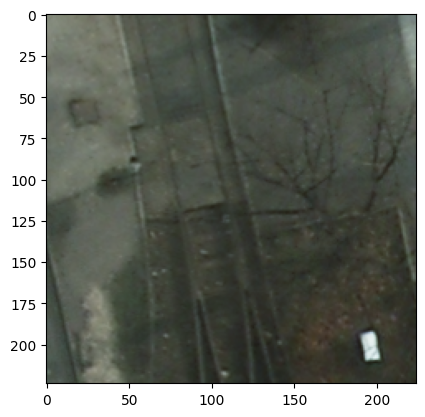

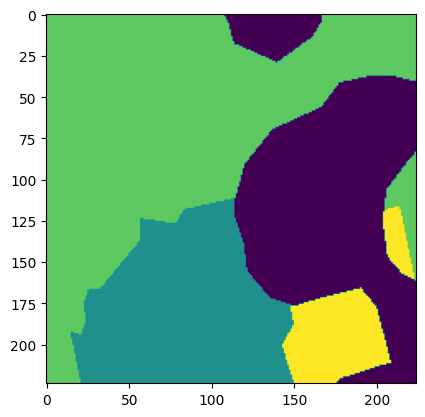

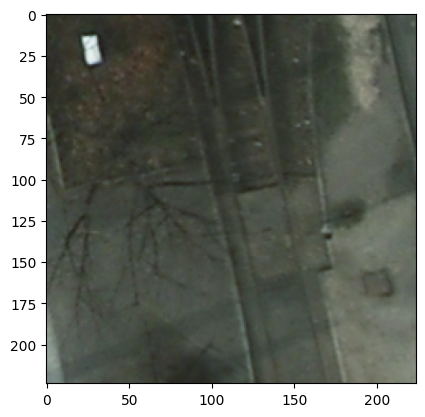

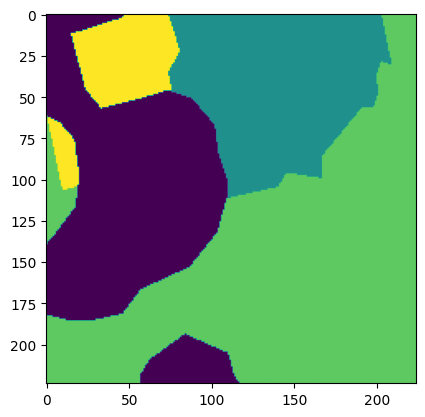

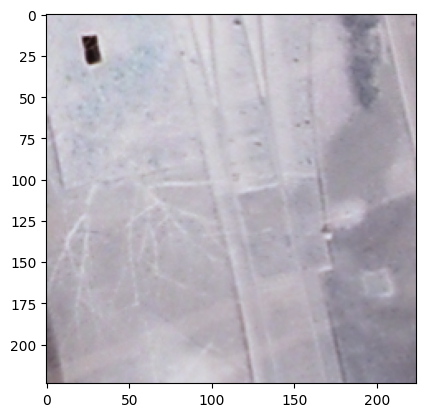

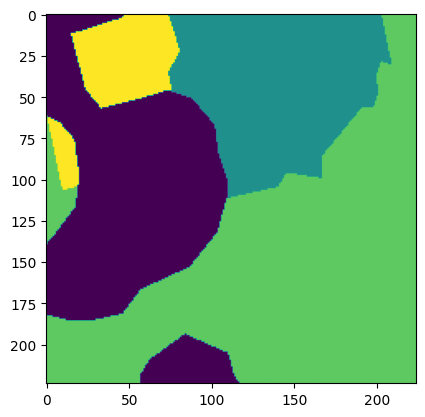

In [98]:
import torch
from torchvision.transforms import v2
from torchvision.transforms import ToTensor
from PIL import Image
import matplotlib.pyplot as plt
from random import random
import torchvision.transforms as T


class RandomFlip:
    def __init__(self, prob=0.5):
        self.prob = prob

    def __call__(self, img, mask):
        if random() < self.prob:
            # Apply horizontal flip
            img = T.functional.hflip(img)
            mask = T.functional.hflip(mask)
        if random() < self.prob:
            # Apply vertical flip
            img = T.functional.vflip(img)
            mask = T.functional.vflip(mask)
        return img, mask

path_image = "C:\\Users\\eros\\CVCS\\dataset\\Postdam_256x256_full\\Images\\Image_0.png"
path_label = "C:\\Users\\eros\\CVCS\\dataset\\Postdam_256x256_full\\Labels\\Label_0.png"
image = ToTensor()(Image.open(path_image))
mask = ToTensor()(Image.open(path_label))
transform = RandomFlip(prob=.8)
transforms2 = v2.Compose([
    v2.RandomInvert(p=1)
])
image, mask = transform(image, mask)
images_path = "C:\\Users\\eros\\CVCS\\dataset\\Postdam_256x256_full\\Images"
labels_path = "C:\\Users\\eros\\CVCS\\dataset\\Postdam_256x256_full\\Labels"
extension = ".png"
data = PostDamDataset(images_path, labels_path,extension, transforms=transform, crop=224, augment_mask=True)
base = PostDamDataset(images_path, labels_path,extension, crop=224)
colored = PostDamDataset(images_path, labels_path,extension, transforms = transforms2, crop=224)
image, mask,_ = data.__getitem__(412)
bimage, bmask,_ = base.__getitem__(412)
cimage, cmask, _ = colored.__getitem__(412)
plt.imshow(image.swapaxes(0,2).swapaxes(0,1))
plt.show()
plt.imshow(mask)
plt.show()
plt.imshow(bimage.swapaxes(0,2).swapaxes(0,1))
plt.show()
plt.imshow(bmask)
plt.show()
plt.imshow(cimage.swapaxes(0,2).swapaxes(0,1))
plt.show()
plt.imshow(cmask)
plt.show()